In [27]:
import quandl
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


In [9]:
quandl.ApiConfig.api_key = 'zD6Adeqgd3n3CfJMiWj6'
#Kind of service WIKI 
#dataframe
df = quandl.get('WIKI/TSLA')
df = df[['Adj. Close']]
df.head()
df

,Adj. Close
Date,
2010-06-29,23.89
2010-06-30,23.83
2010-07-01,21.96
2010-07-02,19.20
2010-07-06,16.11
...,...
2018-03-21,316.53
2018-03-22,309.10
2018-03-23,301.54


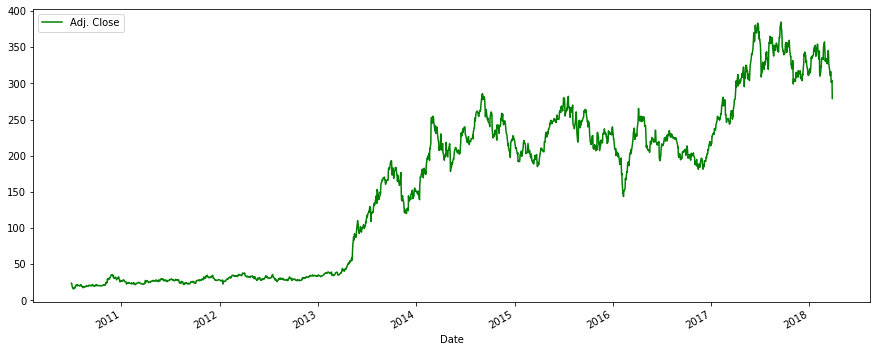

In [11]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

In [22]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)
#Features 
X = np.array(df.drop(['Prediction'],1))
#Mean 0 
#Standar deviation 1 
X = preprocessing.scale(X)
X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#estimator instance (classifier) 
clf = LinearRegression()
clf.fit(X_train, y_train)
#p-value(confidence)
confidence =clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
forecast_predicted

array([324.31346774, 322.99619772, 334.46620444, 335.85665612,
       335.15411211, 333.71975143, 346.2777256 , 352.01516835,
       357.25497575, 350.98086744, 343.24312578, 331.40721073,
       335.49562656, 333.7685392 , 328.74339802, 332.74399586,
       329.62157803, 327.73836979, 345.63372692, 342.05270399,
       327.21146178, 326.20643354, 322.05947237, 314.45833649,
       311.52131223, 317.35633053, 310.10646665, 302.72975455,
       305.30574925, 280.91186002])

In [32]:
dates = pd.date_range(start='2018-03-28', end='2018-04-26')
dates 

DatetimeIndex(['2018-03-28', '2018-03-29', '2018-03-30', '2018-03-31',
               '2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26'],
              dtype='datetime64[ns]', freq='D')

(17282.0, 17789.9)

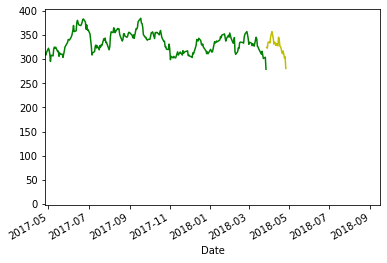

In [35]:
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))